In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [267]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')

In [268]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [269]:
real_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/weather_solar_actual.csv')

In [270]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0
...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0


In [271]:
forecast_weather['Forecast time'] = pd.to_datetime(forecast_weather['Forecast time'])

In [272]:
real_weather = real_weather.iloc[:,2:]

In [273]:
real_weather.columns = ['date','temp','wind_speed','wind_dir','humidity']

In [274]:
forecast_weather['real_time'] = ''

In [275]:
for i in range(len(forecast_weather)):
    forecast_weather['real_time'][i] = forecast_weather['Forecast time'][i] + datetime.timedelta(hours=forecast_weather['forecast'][i])

In [361]:
forecast_weather_eda = forecast_weather.groupby(['real_time']).mean().drop('forecast', axis=1)

In [345]:
from scipy import interpolate

In [363]:
forecast_weather_eda.reset_index(inplace=True)

In [364]:
forecast_weather_eda

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [360]:
forecast_weather_eda

,temperature,humidity,windspeed,winddirection
real_time,,,,
2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...
2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000


In [347]:
forecast_weather

,Forecast time,forecast,temperature,humidity,windspeed,winddirection,real_time
0,2020-09-01 11:00:00,4.0,31.0,65.0,3.0,101.0,2020-09-01 15:00:00
1,2020-09-01 11:00:00,7.0,29.0,80.0,2.4,90.0,2020-09-01 18:00:00
2,2020-09-01 11:00:00,10.0,26.0,90.0,1.7,65.0,2020-09-01 21:00:00
3,2020-09-01 11:00:00,13.0,26.0,90.0,1.5,48.0,2020-09-02 00:00:00
4,2020-09-01 11:00:00,16.0,25.0,90.0,1.6,40.0,2020-09-02 03:00:00
...,...,...,...,...,...,...,...
230259,2022-07-01 08:00:00,60.0,26.0,80.0,2.5,78.0,2022-07-03 20:00:00
230260,2022-07-01 08:00:00,61.0,26.0,85.0,2.1,76.0,2022-07-03 21:00:00
230261,2022-07-01 08:00:00,62.0,25.0,85.0,1.7,65.0,2022-07-03 22:00:00
230262,2022-07-01 08:00:00,63.0,25.0,85.0,1.6,43.0,2022-07-03 23:00:00


In [277]:
solar['datetime'] = pd.to_datetime(solar['datetime'])

In [278]:
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

In [402]:
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()

In [403]:
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')

In [404]:
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')

In [405]:
solar_eda.date = pd.to_datetime(solar_eda.date)

In [406]:
solar_eda = solar_eda.set_index('date')

In [ ]:
real_weather = real_weather.set_index('date')

In [ ]:
real_weather.date = pd.to_datetime(real_weather.date)

In [321]:
real_weather.set_index('date', inplace=True)

In [334]:
forecast_x = forecast_weather_eda.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [335]:
real_x = real_weather.loc[solar_eda.index[0]:solar_eda.index[-1]]

In [409]:
solar_eda = solar_eda.fillna(0)

In [410]:
solar_eda

,year,month,day,hour,target
date,,,,,
2020-09-10 00:00:00,2020,9,10,0,0.00
2020-09-10 01:00:00,2020,9,10,1,0.00
2020-09-10 02:00:00,2020,9,10,2,0.00
2020-09-10 03:00:00,2020,9,10,3,0.00
2020-09-10 04:00:00,2020,9,10,4,0.00
...,...,...,...,...,...
2022-04-30 19:00:00,2022,4,30,19,0.85
2022-04-30 20:00:00,2022,4,30,20,0.00
2022-04-30 21:00:00,2022,4,30,21,0.00


In [386]:
from sklearn.preprocessing import StandardScaler 

In [387]:
sc = StandardScaler()

In [394]:
solar_eda

,0,1,2,3,4
0,-1.621075,0.666153,-0.669259,-1.661325,-0.439778
1,-1.621075,0.666153,-0.669259,-1.516862,-0.439778
2,-1.621075,0.666153,-0.669259,-1.372399,-0.439778
3,-1.621075,0.666153,-0.669259,-1.227936,-0.439778
4,-1.621075,0.666153,-0.669259,-1.083473,-0.439778
...,...,...,...,...,...
14347,1.583563,-0.662598,1.619003,1.083473,-0.437307
14348,1.583563,-0.662598,1.619003,1.227936,-0.439778
14349,1.583563,-0.662598,1.619003,1.372399,-0.439778
14350,1.583563,-0.662598,1.619003,1.516862,-0.439778


In [411]:
real_x = pd.DataFrame(sc.fit_transform(real_x), columns=['temp','wind_speed','wind_dir','humidity'])
solar_eda = pd.DataFrame(sc.fit_transform(solar_eda), columns = ['year','month','day','hour','target'])

In [412]:
y = solar_eda.target

In [413]:
train_x = real_x.iloc[:int(len(real_x)*0.8),:]
test_x = real_x.iloc[int(len(real_x)*0.8):,:]

In [414]:
train_y = y.iloc[:int(len(y)*0.8)]
test_y = y.iloc[int(len(y)*0.8):]

In [107]:
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

In [129]:
latitude = 37.456
longitude = 126.705

In [130]:
tus = Location(latitude, longitude, 'ROK')

In [132]:
time = pd.date_range(start=forecast_weather_eda.index.min(), end = forecast_weather_eda.index.max(), freq='H', tz = tus.tz)

In [135]:
cs = tus.get_clearsky(time)

In [138]:
cs

,ghi,dni,dhi
2020-09-01 15:00:00+09:00,672.205540,763.020810,126.066169
2020-09-01 16:00:00+09:00,509.779364,695.181238,111.699856
2020-09-01 17:00:00+09:00,313.589459,565.928253,89.242537
2020-09-01 18:00:00+09:00,109.238226,298.243072,49.738810
2020-09-01 19:00:00+09:00,0.010326,0.070536,0.010165
...,...,...,...
2022-07-03 20:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 21:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 22:00:00+09:00,0.000000,0.000000,0.000000
2022-07-03 23:00:00+09:00,0.000000,0.000000,0.000000


<Axes: >

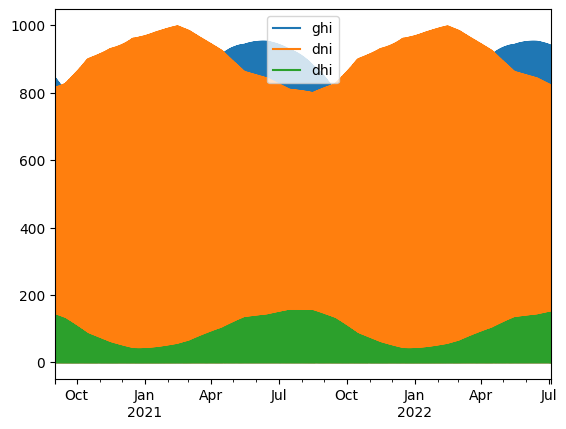

In [136]:
cs.plot()

<Axes: >

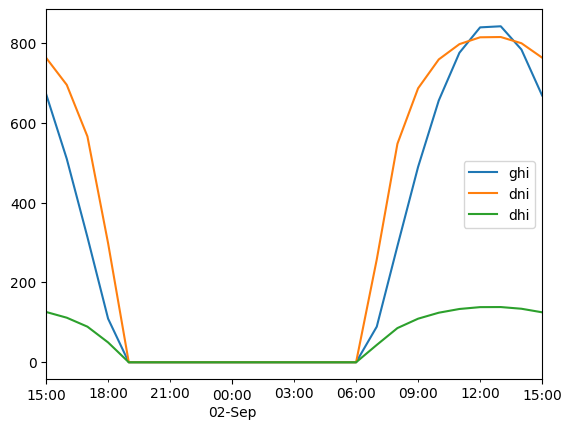

In [137]:
cs.iloc[:25,:].plot()

### DNI : Direct normal irradiance
### DHI : Diffuse horizontal irradiance
### GHI : Global solar radiation on a horizontal irradiance

---
# DNN model

In [420]:
x_test = tf.convert_to_tensor(test_x.values, dtype=tf.float32)
x_train = tf.convert_to_tensor(train_x.values, dtype=tf.float32)

In [421]:
y_test = tf.convert_to_tensor(test_y.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(train_y.values, dtype=tf.float32)

In [422]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(4,)), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(2048, activation='softmax'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [423]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [424]:
model.compile(loss = 'mse', optimizer = 'adam')

In [425]:
model.fit(x_train, y_train, epochs=300)

Epoch 1/300
359/359 [==============================] - 1s 608us/step - loss: 1.9511
Epoch 2/300
359/359 [==============================] - 0s 600us/step - loss: 1.9511
Epoch 3/300
359/359 [==============================] - 0s 607us/step - loss: 1.9511
Epoch 4/300
359/359 [==============================] - 0s 609us/step - loss: 1.9511
Epoch 5/300
359/359 [==============================] - 0s 606us/step - loss: 1.9511
Epoch 6/300
359/359 [==============================] - 0s 601us/step - loss: 1.9511
Epoch 7/300
359/359 [==============================] - 0s 597us/step - loss: 1.9511
Epoch 8/300
359/359 [==============================] - 0s 603us/step - loss: 1.9511
Epoch 9/300
359/359 [==============================] - 0s 595us/step - loss: 1.9511
Epoch 10/300
359/359 [==============================] - 0s 601us/step - loss: 1.9511
Epoch 11/300
359/359 [==============================] - 0s 600us/step - loss: 1.9511
Epoch 12/300
359/359 [==============================] - 0s 609us/step - lo

In [426]:
predict = model.predict(x_test)

90/90 [==============================] - 0s 472us/step


In [427]:
from sklearn.metrics import mean_squared_error

In [428]:
mean_squared_error(y_test, predict)

2.1953745

In [432]:
from sklearn.metrics import r2_score

In [433]:
r2_score(y_test, predict)

-0.8318301583081138

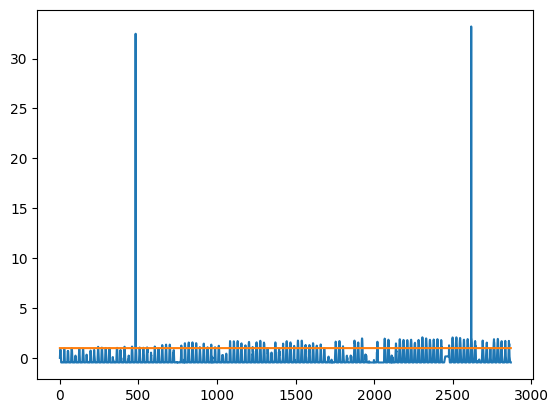

In [430]:
plt.plot(y_test)
plt.plot(predict)